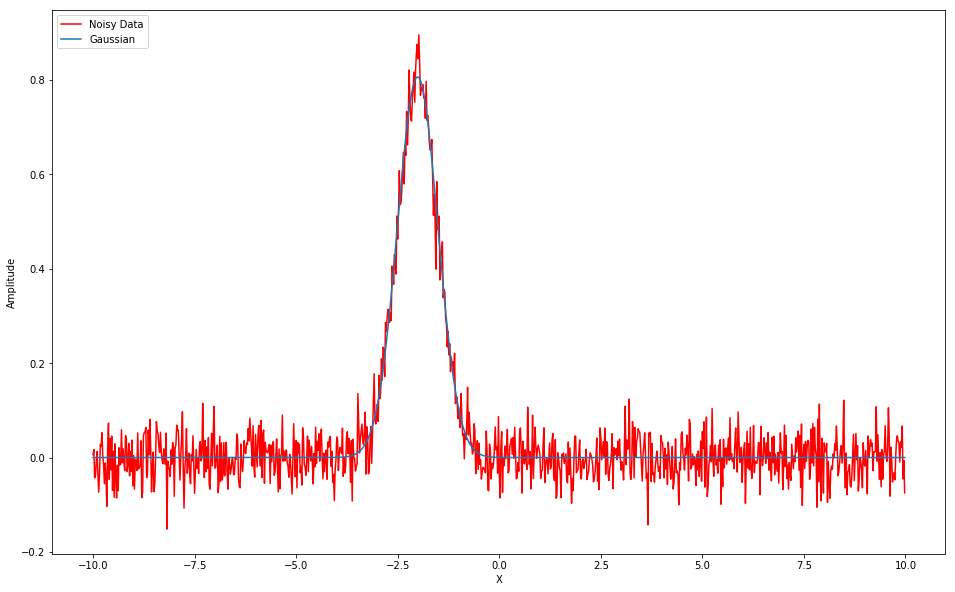

In [1]:
!pip install astropy

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

def peval(x, p):
   	# The model function with parameters p
   	return (1./sqrt(2*np.pi*p[1]**2))*np.exp(-(x-p[0])**2/(2*p[1]**2))

# Generate model data for a Gaussian with param mu and sigma and add noise
x = np.arange(-10.,10.,20./1000) #1000 points
preal = [-2, .5]
y_true = peval(x,preal)
mu,sigma = 0,0.7

#Create my spectrum
y  	= y_true + 0.06 * np.random.normal(mu,sigma, len(x) )

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=0.7, mean=-2, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(16,10))
plt.plot(x, y, 'r', label='Noisy Data')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.legend(loc=2)
plt.show()
